# **NFL Data Bowl**
## **Cleaning and Pre-Analysis**

In [2]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import math
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Get rid of Cap for EDA

# pd.set_option('display.max_columns', 32)
# pd.set_option('display.max_rows', 138)
# pd.set_option('display.max_colwidth', None)  # Allows full column width display


# Put it Back

# pd.reset_option('display.max_columns')
pd.reset_option('display.max_rows')
# pd.reset_option('display.max_colwidth')

### **NFL Big Data Bowl Cleaning and EDA**

In [4]:
games = pd.read_csv("/Users/leemcfarling/Documents/BU Grad School/Semester Two /AI for Leaders/NFL_Stats/BigDataBowl/games.csv")
pffScoutingData = pd.read_csv("/Users/leemcfarling/Documents/BU Grad School/Semester Two /AI for Leaders/NFL_Stats/BigDataBowl/pffScoutingData.csv")
players = pd.read_csv("/Users/leemcfarling/Documents/BU Grad School/Semester Two /AI for Leaders/NFL_Stats/BigDataBowl/players.csv")
plays = pd.read_csv("/Users/leemcfarling/Documents/BU Grad School/Semester Two /AI for Leaders/NFL_Stats/BigDataBowl/plays.csv")

week1 = pd.read_csv("/Users/leemcfarling/Documents/BU Grad School/Semester Two /AI for Leaders/NFL_Stats/BigDataBowl/week1.csv")
week2 = pd.read_csv("/Users/leemcfarling/Documents/BU Grad School/Semester Two /AI for Leaders/NFL_Stats/BigDataBowl/week2.csv")
week3 = pd.read_csv("/Users/leemcfarling/Documents/BU Grad School/Semester Two /AI for Leaders/NFL_Stats/BigDataBowl/week3.csv")
week4 = pd.read_csv("/Users/leemcfarling/Documents/BU Grad School/Semester Two /AI for Leaders/NFL_Stats/BigDataBowl/week4.csv")
week5 = pd.read_csv("/Users/leemcfarling/Documents/BU Grad School/Semester Two /AI for Leaders/NFL_Stats/BigDataBowl/week5.csv")
week6 = pd.read_csv("/Users/leemcfarling/Documents/BU Grad School/Semester Two /AI for Leaders/NFL_Stats/BigDataBowl/week6.csv")
week7 = pd.read_csv("/Users/leemcfarling/Documents/BU Grad School/Semester Two /AI for Leaders/NFL_Stats/BigDataBowl/week7.csv")
week8 = pd.read_csv("/Users/leemcfarling/Documents/BU Grad School/Semester Two /AI for Leaders/NFL_Stats/BigDataBowl/week1.csv")

Quick Count on Rows

In [5]:
print(f"There are {len(games):,} rows in the 'games' Tracking Dataset.")
print(f"There are {len(pffScoutingData):,} rows in the 'pffScoutingData' Dataset.")
print(f"There are {len(players):,} rows in the players Dataset") 
print(f"There are {len(plays):,} rows in the plays Dataset") 
print()
print(f"There are {len(week1):,} rows in the week1 List Dataset")
print(f"There are {len(week2):,} rows in the week2 List Dataset") 
print(f"There are {len(week3):,} rows in the week3 List Dataset")
print(f"There are {len(week4):,} rows in the week4 List Dataset")
print(f"There are {len(week5):,} rows in the week5 List Dataset")
print(f"There are {len(week6):,} rows in the week6 List Dataset")
print(f"There are {len(week7):,} rows in the week7 List Dataset")
print(f"There are {len(week8):,} rows in the week8 List Dataset")



There are 122 rows in the 'games' Tracking Dataset.
There are 188,254 rows in the 'pffScoutingData' Dataset.
There are 1,679 rows in the players Dataset
There are 8,557 rows in the plays Dataset

There are 1,118,122 rows in the week1 List Dataset
There are 1,042,774 rows in the week2 List Dataset
There are 1,121,825 rows in the week3 List Dataset
There are 1,074,606 rows in the week4 List Dataset
There are 1,097,813 rows in the week5 List Dataset
There are 973,797 rows in the week6 List Dataset
There are 906,292 rows in the week7 List Dataset
There are 1,118,122 rows in the week8 List Dataset


In [6]:
week1.head(4)

gameId  playId    nflId  frameId                     time  \
0  2021090900      97  25511.0        1  2021-09-10T00:26:31.100   
1  2021090900      97  25511.0        2  2021-09-10T00:26:31.200   
2  2021090900      97  25511.0        3  2021-09-10T00:26:31.300   
3  2021090900      97  25511.0        4  2021-09-10T00:26:31.400   

   jerseyNumber team playDirection      x      y     s     a   dis       o  \
0          12.0   TB         right  37.77  24.22  0.29  0.30  0.03  165.16   
1          12.0   TB         right  37.78  24.22  0.23  0.11  0.02  164.33   
2          12.0   TB         right  37.78  24.24  0.16  0.10  0.01  160.24   
3          12.0   TB         right  37.73  24.25  0.15  0.24  0.06  152.13   

      dir event  
0   84.99   NaN  
1   92.87   NaN  
2   68.55   NaN  
3  296.85   NaN

#### **Next Gen Statistics Aggregation**
- Developed with help from ChatGPT -- https://chatgpt.com/share/67caff72-ebf0-800f-a1d6-e162bf42afab

In [7]:
def aggregate_player_tracking_data(df, group_cols, id_columns):
    pre_process = df.loc[
        df[id_columns].eq(df[id_columns].min()).all(axis=1)
    ]

    # Identify numeric columns, excluding the provided id_columns
    numeric_cols = [col for col in pre_process.select_dtypes(include=['number']).columns if col not in id_columns]

    # Function to return first non-null value in a group
    def first_non_nan(series):
        return series.dropna().iloc[0] if not series.dropna().empty else 'NA'

    # Aggregation rules
    agg_rules = {
        **{col: 'mean' for col in numeric_cols},  # Mean for numeric columns
        **{col: first_non_nan for col in id_columns},  # First valid value for ID columns
        **{col: first_non_nan for col in df.columns if col not in numeric_cols and col not in id_columns}  
    }

    result = df.groupby(group_cols).agg(agg_rules)
    result_post_process = result.drop(columns=group_cols, axis=1, errors='ignore')
    result_reset_index = result_post_process.reset_index()

    return result_reset_index

In [8]:
id_cols = ['frameId', 'jerseyNumber']  # ID columns
groupby_cols = ['gameId','nflId', 'playId']  # Grouping columns
NGSWeekData = [week1, week2, week3, week4, week5, week6, week7, week8]


processed_dfs = [aggregate_player_tracking_data(d, groupby_cols, id_cols) for d in NGSWeekData]
final_df = pd.concat(processed_dfs, ignore_index=True)
merged_df = final_df.merge(plays, on=['gameId', 'playId'], how='left')
len(merged_df)


191400

#### **Quick EDA on NGS Data from the merged_df**

In [9]:
merged_df[merged_df['playDescription'].str.contains('injur')]

gameId    nflId  playId          x          y         s         a  \
46      2021090900  34777.0     788  33.408333  32.579583  2.235000  1.822917   
78      2021090900  35441.0    2530  32.657353  25.805882  2.112353  1.415000   
101     2021090900  35454.0     788  34.023750  25.055000  2.941250  1.419583   
117     2021090900  35454.0    2330  59.988592  28.701268  2.789577  2.024225   
118     2021090900  35454.0    2530  33.600294  31.525294  1.722941  1.768529   
...            ...      ...     ...        ...        ...       ...       ...   
191099  2021091300  52506.0    2771  56.219783  17.677826  1.881739  2.018043   
191162  2021091300  52517.0    2771  62.795435  22.813696  0.772826  0.800652   
191260  2021091300  53446.0    2771  65.295000  26.360217  2.097826  1.570435   
191302  2021091300  53460.0    2771  63.661522  19.943043  2.611087  2.423043   
191350  2021091300  53472.0    3544  47.267391  23.965000  2.941522  1.180652   

             dis           o         dir  ...  foulNFLId3  \
46      0.222500   94.575000   96.836667  ...         NaN   
78      0.216471  298.565294  237.656765  ...         NaN   
101     0.310000   74.635417   85.806250  ...         NaN   
117     0.287042  153.749718  204.415070  ...         NaN   
118     0.176765  277.488529  240.718529  ...         NaN   
...          ...         ...         ...  ...         ...   
191099  0.187174   92.440652  147.602826  ...         NaN   
191162  0.080000  285.616087   90.981522  ...         NaN   
191260  0.216739  222.782609  138.677826  ...         NaN   
191302  0.260435  150.026739  132.251304  ...         NaN   
191350  0.295435   78.363043  279.224348  ...         NaN   

        absoluteYardlineNumber offenseFormation        personnelO  \
46                        32.0          SHOTGUN  1 RB, 2 TE, 2 WR   
78                        35.0          SHOTGUN  1 RB, 1 TE, 3 WR   
101                       32.0          SHOTGUN  1 RB, 2 TE, 2 WR   
117                       67.0            EMPTY  1 RB, 1 TE, 3 WR   
118                       35.0          SHOTGUN  1 RB, 1 TE, 3 WR   
...                        ...              ...               ...   
191099                    60.0          SHOTGUN  1 RB, 2 TE, 2 WR   
191162                    60.0          SHOTGUN  1 RB, 2 TE, 2 WR   
191260                    60.0          SHOTGUN  1 RB, 2 TE, 2 WR   
191302                    60.0          SHOTGUN  1 RB, 2 TE, 2 WR   
191350                    67.0           PISTOL  2 RB, 1 TE, 2 WR   

       defendersInBox        personnelD dropBackType  pff_playAction  \
46                6.0  4 DL, 3 LB, 4 DB  TRADITIONAL               0   
78                6.0  3 DL, 3 LB, 5 DB  TRADITIONAL               0   
101               6.0  4 DL, 3 LB, 4 DB  TRADITIONAL               0   
117               5.0  3 DL, 3 LB, 5 DB     SCRAMBLE               0   
118               6.0  3 DL, 3 LB, 5 DB  TRADITIONAL               0   
...               ...               ...          ...             ...   
191099            6.0  2 DL, 4 LB, 5 DB  TRADITIONAL               0   
191162            6.0  2 DL, 4 LB, 5 DB  TRADITIONAL               0   
191260            6.0  2 DL, 4 LB, 5 DB  TRADITIONAL               0   
191302            6.0  2 DL, 4 LB, 5 DB  TRADITIONAL               0   
191350            5.0  4 DL, 3 LB, 4 DB  TRADITIONAL               1   

        pff_passCoverage  pff_passCoverageType  
46               Cover-1                   Man  
78               Cover-2                  Zone  
101              Cover-1                   Man  
117             Quarters                  Zone  
118              Cover-2                  Zone  
...                  ...                   ...  
191099           Cover-1                   Man  
191162           Cover-1                   Man  
191260           Cover-1                   Man  
191302           Cover-1                   Man  
191350           Cover-3                  Zone  

[4730 rows x 46 columns

In [10]:
merged_df[merged_df['playId'] == 788].groupby('playId').count().sort_values(by='gameId', ascending=False)

gameId  nflId    x    y    s    a  dis    o  dir  frameId  ...  \
playId                                                             ...   
788        198    198  198  198  198  198  198  198  198      198  ...   

        foulNFLId3  absoluteYardlineNumber  offenseFormation  personnelO  \
playId                                                                     
788              0                     198               198         198   

        defendersInBox  personnelD  dropBackType  pff_playAction  \
playId                                                             
788                198         198           198             198   

        pff_passCoverage  pff_passCoverageType  
playId                                          
788                  198                   198  

[1 rows x 45 columns]

In [11]:
pd.set_option('display.max_colwidth', None)  # Allows full column width display
plays[plays['playId'] == 788].head(1)

gameId  playId  \
15  2021090900     788   

                                                                                                                                                                  playDescription  \
15  (1:43) (Shotgun) D.Prescott pass short left to C.Lamb for 22 yards, TOUCHDOWN [R.Nunez-Roches]. TB-S.Murphy-Bunting was injured during the play. His return is Questionable.    

    quarter  down  yardsToGo possessionTeam defensiveTeam yardlineSide  \
15        1     2          3            DAL            TB           TB   

    yardlineNumber  ... foulNFLId3  absoluteYardlineNumber  offenseFormation  \
15              22  ...        NaN                    32.0           SHOTGUN   

          personnelO  defendersInBox        personnelD  dropBackType  \
15  1 RB, 2 TE, 2 WR             6.0  4 DL, 3 LB, 4 DB   TRADITIONAL   

   pff_playAction  pff_passCoverage pff_passCoverageType  
15              0           Cover-1                  Man  

[1 rows x 32 columns]

So it looks like this particular play corresponds to a shotgun short left pass form D.Preskott to C.Lamb

In [12]:
pd.set_option('display.max_rows', 138)
sanity_check = merged_df[merged_df['playId'] == 788].groupby(['gameId', 'nflId']).count()
sanity_check


playId  x  y  s  a  dis  o  dir  frameId  jerseyNumber  \
gameId     nflId                                                             
2021090900 34777.0       2  2  2  2  2    2  2    2        2             2   
           35454.0       2  2  2  2  2    2  2    2        2             2   
           37082.0       2  2  2  2  2    2  2    2        2             2   
           38588.0       2  2  2  2  2    2  2    2        2             2   
           40074.0       2  2  2  2  2    2  2    2        2             2   
           42560.0       2  2  2  2  2    2  2    2        2             2   
           42654.0       2  2  2  2  2    2  2    2        2             2   
           43293.0       2  2  2  2  2    2  2    2        2             2   
           43424.0       2  2  2  2  2    2  2    2        2             2   
           45532.0       2  2  2  2  2    2  2    2        2             2   
           46119.0       2  2  2  2  2    2  2    2        2             2   
           46132.0       2  2  2  2  2    2  2    2        2             2   
           46150.0       2  2  2  2  2    2  2    2        2             2   
           46206.0       2  2  2  2  2    2  2    2        2             2   
           47788.0       2  2  2  2  2    2  2    2        2             2   
           47822.0       2  2  2  2  2    2  2    2        2             2   
           47873.0       2  2  2  2  2    2  2    2        2             2   
           47882.0       2  2  2  2  2    2  2    2        2             2   
           52425.0       2  2  2  2  2    2  2    2        2             2   
           52453.0       2  2  2  2  2    2  2    2        2             2   
           52554.0       2  2  2  2  2    2  2    2        2             2   
           53461.0       2  2  2  2  2    2  2    2        2             2   
2021091208 34540.0       2  2  2  2  2    2  2    2        2             2   
           35462.0       2  2  2  2  2    2  2    2        2             2   
           39998.0       2  2  2  2  2    2  2    2        2             2   
           40024.0       2  2  2  2  2    2  2    2        2             2   
           40089.0       2  2  2  2  2    2  2    2        2             2   
           41390.0       2  2  2  2  2    2  2    2        2             2   
           41959.0       2  2  2  2  2    2  2    2        2             2   
           42488.0       2  2  2  2  2    2  2    2        2             2   
           43313.0       2  2  2  2  2    2  2    2        2             2   
           43373.0       2  2  2  2  2    2  2    2        2             2   
           44819.0       2  2  2  2  2    2  2    2        2             2   
           44829.0       2  2  2  2  2    2  2    2        2             2   
           45573.0       2  2  2  2  2    2  2    2        2             2   
           46082.0       2  2  2  2  2    2  2    2        2             2   
           47809.0       2  2  2  2  2    2  2    2        2             2   
           47956.0       2  2  2  2  2    2  2    2        2             2   
           48556.0       2  2  2  2  2    2  2    2        2             2   
           52410.0       2  2  2  2  2    2  2    2        2             2   
           52414.0       2  2  2  2  2    2  2    2        2             2   
           52624.0       2  2  2  2  2    2  2    2        2             2   
           53442.0       2  2  2  2  2    2  2    2        2             2   
           53503.0       2  2  2  2  2    2  2    2        2             2   
2021091212 38642.0       2  2  2  2  2    2  2    2        2             2   
           40031.0       2  2  2  2  2    2  2    2        2             2   
           41258.0       2  2  2  2  2    2  2    2        2             2   
           42349.0       2  2  2  2  2    2  2    2        2             2   
           42358.0       2  2  2  2  2    2  2    2        2             2   
           43351.0       2  2  2  2  2    

So for this particular play, it seems like this play was run in 6 seperate NFL games over the weeks, three of those weeks, the play was ran twice, with an additional play run in each of the following weeks for a total of 9 times over 8 weeks. 

It is unclear which of these play runs resulted in the injury. 



In [13]:
pd.reset_option('display.max_rows')
pd.reset_option('display.max_colwidth')

## **Why Next Gen Stats will not be included moving forward**

There is a fundamental issue with integrating Next Gen Stats (NGS) player tracking data with the existing play-level data from the NFL. The NFL’s play-level data provides specific details about a play, such as:
- Who was involved (e.g., “Player A passed to Player B”)
- What happened (e.g., “Player C was injured during the play”)
- Play outcomes (e.g., “The pass was incomplete, intercepted, or resulted in a touchdown”)

However, Next Gen Stats (NGS) tracks every player’s movement for every play across the entire season. This creates a challenge because:

1. **Plays Are Repeated Multiple Times**
    - A particular play design (e.g., a screen pass from Player A to Player B) might be executed 50+ times over 8 weeks.
    - The play description only summarizes one instance, but the same play can have different outcomes each time it’s run.
2. **Injury Events Are Not Tied to a Specific Instance of the Play**
    - If a single instance of the play resulted in an injury, but it was run dozens or hundreds of times, there’s no way to determine exactly which instance caused the injury.
    - The injury-related play-level data does not provide a unique identifier to match the exact play occurrence to a specific NGS-tracked instance.
3. **Averaging NGS Data Leads to Misrepresentation**
    - If we aggregate player tracking data for every instance of a play, we would be averaging field positions, speeds, accelerations, and other NGS metrics across all occurrences of the play.
    - This results in a dataset where the movement and positioning data do not correspond to the actual injury event—they are instead a generalized average of all times that play was executed.
    - As a result, the NGS data cannot reliably be incorporated into injury statistics because it would not reflect the specific instance when the injury actually occurred.

**Conclusion**

Since we cannot directly link an injury to a specific play occurrence, incorporating averaged NGS data into injury analysis would be misleading. For this reason, Next Gen Stats will not be included in the injury statistics to avoid drawing inaccurate conclusions.

⸻


___

Double Checking Injury Rates

In [14]:
len(plays[plays['playDescription'].str.contains('inju')]) / len(plays) 

0.024424447820497838

### **First, let's get a handle on any Null Data Fields**

In [15]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   gameId           122 non-null    int64 
 1   season           122 non-null    int64 
 2   week             122 non-null    int64 
 3   gameDate         122 non-null    object
 4   gameTimeEastern  122 non-null    object
 5   homeTeamAbbr     122 non-null    object
 6   visitorTeamAbbr  122 non-null    object
dtypes: int64(3), object(4)
memory usage: 6.8+ KB


In [16]:
games.describe()

gameId  season        week
count  1.220000e+02   122.0  122.000000
mean   2.021098e+09  2021.0    4.385246
std    4.979166e+03     0.0    2.290645
min    2.021091e+09  2021.0    1.000000
25%    2.021092e+09  2021.0    2.000000
50%    2.021100e+09  2021.0    4.000000
75%    2.021102e+09  2021.0    6.000000
max    2.021110e+09  2021.0    8.000000

In [17]:
plays.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8557 entries, 0 to 8556
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gameId                  8557 non-null   int64  
 1   playId                  8557 non-null   int64  
 2   playDescription         8557 non-null   object 
 3   quarter                 8557 non-null   int64  
 4   down                    8557 non-null   int64  
 5   yardsToGo               8557 non-null   int64  
 6   possessionTeam          8557 non-null   object 
 7   defensiveTeam           8557 non-null   object 
 8   yardlineSide            8432 non-null   object 
 9   yardlineNumber          8557 non-null   int64  
 10  gameClock               8557 non-null   object 
 11  preSnapHomeScore        8557 non-null   int64  
 12  preSnapVisitorScore     8557 non-null   int64  
 13  passResult              8557 non-null   object 
 14  penaltyYards            756 non-null    

Aside: If player performance and Injury Analysis isn't fruitful we could always look into penalties with this dataset

In [18]:
plays[plays['playId'].duplicated()]

gameId  playId                                    playDescription  \
145   2021091200    3110  (5:28) (Shotgun) M.Ryan pass short left to M.D...   
235   2021091201    3655  (5:23) (Shotgun) B.Roethlisberger pass incompl...   
285   2021091202    1991  (:47) (No Huddle, Shotgun) S.Darnold pass shor...   
319   2021091202    3820  (2:51) (Shotgun) Z.Wilson sacked at CAR 20 for...   
350   2021091203    1885  (1:11) (Shotgun) J.Burrow pass short middle to...   
...          ...     ...                                                ...   
8546  2021110100    3909  (5:42) D.Jones pass short middle to D.Booker t...   
8548  2021110100    4016  (4:41) (Shotgun) P.Mahomes pass incomplete sho...   
8550  2021110100    4071  (4:29) (Shotgun) P.Mahomes pass short right in...   
8553  2021110100    4363  (1:07) (Shotgun) D.Jones pass short right to E...   
8554  2021110100    4392  (1:01) (No Huddle, Shotgun) D.Jones sacked at ...   

      quarter  down  yardsToGo possessionTeam defensiveTeam yardlineSide  \
145         3     3          5            ATL           PHI          ATL   
235         4     1         10            PIT           BUF          PIT   
285         2     1         10            CAR           NYJ          NYJ   
319         4     1         10            NYJ           CAR          CAR   
350         2     1         10            CIN           MIN          CIN   
...       ...   ...        ...            ...           ...          ...   
8546        4     1         10            NYG            KC          NYG   
8548        4     1         10             KC           NYG           KC   
8550        4     2         20             KC           NYG           KC   
8553        4     1         10            NYG            KC          NYG   
8554        4     2          7            NYG            KC          NYG   

      yardlineNumber  ... foulNFLId3  absoluteYardlineNumber  \
145               24  ...        NaN                    34.0   
235               25  ...        NaN                    85.0   
285               27  ...        NaN                    83.0   
319               10  ...        NaN                    20.0   
350               25  ...        NaN                    35.0   
...              ...  ...        ...                     ...   
8546              39  ...        NaN                    49.0   
8548              29  ...        NaN                    81.0   
8550              19  ...        NaN                    91.0   
8553              25  ...        NaN                    35.0   
8554              28  ...        NaN                    38.0   

      offenseFormation        personnelO  defendersInBox        personnelD  \
145            SHOTGUN  1 RB, 1 TE, 3 WR             6.0  4 DL, 2 LB, 5 DB   
235            SHOTGUN  1 RB, 1 TE, 3 WR             7.0  4 DL, 2 LB, 5 DB   
285            SHOTGUN  1 RB, 1 TE, 3 WR             4.0  4 DL, 2 LB, 5 DB   
319              EMPTY  1 RB, 1 TE, 3 WR             4.0  3 DL, 3 LB, 5 DB   
350            SHOTGUN  1 RB, 1 TE, 3 WR             6.0  4 DL, 2 LB, 5 DB   
...                ...               ...             ...               ...   
8546        SINGLEBACK  1 RB, 2 TE, 2 WR             7.0  4 DL, 3 LB, 4 DB   
8548             EMPTY  1 RB, 1 TE, 3 WR             5.0  2 DL, 4 LB, 5 DB   
8550           SHOTGUN  1 RB, 1 TE, 3 WR             4.0  1 DL, 4 LB, 6 DB   
8553           SHOTGUN  1 RB, 1 TE, 3 WR             5.0  4 DL, 1 LB, 6 DB   
8554           SHOTGUN  1 RB, 1 TE, 3 WR             6.0  4 DL, 1 LB, 6 DB   

      dropBackType pff_playAction  pff_passCoverage pff_passCoverageType  
145            NaN              0           Cover-6                 Zone  
235            NaN              1           Cover-3                 Zone  
285    TRADITIONAL              0          Quarters                 Zone  
319    TRADITIONAL              0           Bracket                Other  
350    TRADITIONAL              0          Quarters                

In [19]:
def duplicates_per_column(df):
    for col in df.columns: 
        duplicate_counts = df.groupby(col).size().reset_index(name='Count')
        duplicate_counts = duplicate_counts[duplicate_counts["Count"] > 1]

        if duplicate_counts.empty: 
            print(f"No Duplicates in {col}")
        else:
            print(f"Duplicates found in: {col}")
            print(duplicate_counts)
            print()
            print()

In [20]:
duplicates_per_column(plays)

Duplicates found in: gameId
         gameId  Count
0    2021090900     97
1    2021091200     73
2    2021091201     81
3    2021091202     72
4    2021091203     76
..          ...    ...
117  2021103109     74
118  2021103110     65
119  2021103111     76
120  2021103112     82
121  2021110100     74

[122 rows x 2 columns]


Duplicates found in: playId
      playId  Count
0         54      6
1         55     13
2         56      6
3         59      2
5         62     10
...      ...    ...
3719    4629      2
3726    4670      2
3735    4728      2
3738    4750      2
3749    4883      2

[2462 rows x 2 columns]


Duplicates found in: playDescription
                                        playDescription  Count
8543  TWO-POINT CONVERSION ATTEMPT. L.Jackson pass t...      2
8546  TWO-POINT CONVERSION ATTEMPT. M.Jones pass to ...      2


Duplicates found in: quarter
   quarter  Count
0        1   1735
1        2   2441
2        3   1837
3        4   2446
4        5     98


Duplicat

In [21]:
def mean_median_mode(df):
    categorical_columns = []  
    for col in df.columns:
        if pd.api.types.is_numeric_dtype(df[col]):  
            print(f"Column Name: {col}")
            print(f"Mean: {df[col].mean():.2f}")
            print(f"Median: {df[col].median()}")

            mode_values = df[col].mode()
            mode_display = mode_values[0] if not mode_values.empty else "No Mode"
            print(f"Mode: {mode_display}")
            print()
            print("-" * 30)

        else:
            categorical_columns.append(col)

    print(f"Categorical Columns: {categorical_columns}")

In [22]:
mean_median_mode(plays)

Column Name: gameId
Mean: 2021097803.27
Median: 2021100312.0
Mode: 2021090900

------------------------------
Column Name: playId
Mean: 2159.22
Median: 2156.0
Mode: 76

------------------------------
Column Name: quarter
Mean: 2.62
Median: 3.0
Mode: 4

------------------------------
Column Name: down
Mean: 1.97
Median: 2.0
Mode: 1

------------------------------
Column Name: yardsToGo
Mean: 8.72
Median: 10.0
Mode: 10

------------------------------
Column Name: yardlineNumber
Mean: 29.91
Median: 30.0
Mode: 25

------------------------------
Column Name: preSnapHomeScore
Mean: 11.67
Median: 10.0
Mode: 0

------------------------------
Column Name: preSnapVisitorScore
Mean: 11.26
Median: 10.0
Mode: 0

------------------------------
Column Name: penaltyYards
Mean: 3.53
Median: 4.0
Mode: -10.0

------------------------------
Column Name: prePenaltyPlayResult
Mean: 6.50
Median: 4.0
Mode: 0

------------------------------
Column Name: playResult
Mean: 6.56
Median: 5.0
Mode: 0

--------------

___

## **Univariate Analysis -- Big Data Bowl:**

In [23]:
plays_numeric = plays.select_dtypes(include=['number'])
all_plays_hist = plays_numeric[['quarter', 'down', 'yardsToGo', 'yardlineNumber', 'preSnapHomeScore', 'preSnapVisitorScore', 'penaltyYards', 'prePenaltyPlayResult', 'playResult', 'absoluteYardlineNumber', 'defendersInBox', 'pff_playAction']]

In [24]:
def hist_for_numeric_data(df):
    df.hist(figsize=(12, 10))
    plt.tight_layout()

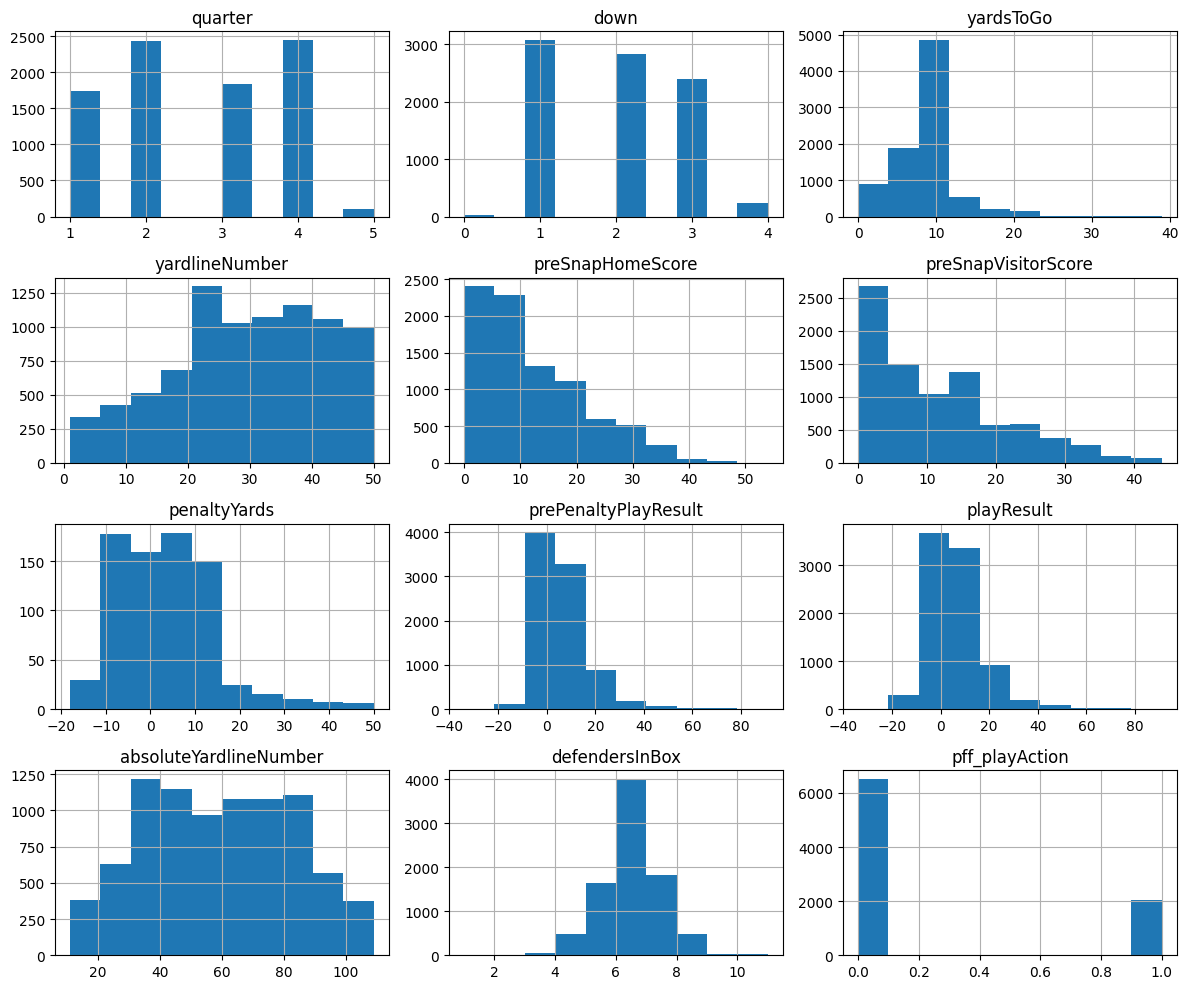

In [25]:
hist_for_numeric_data(all_plays_hist)

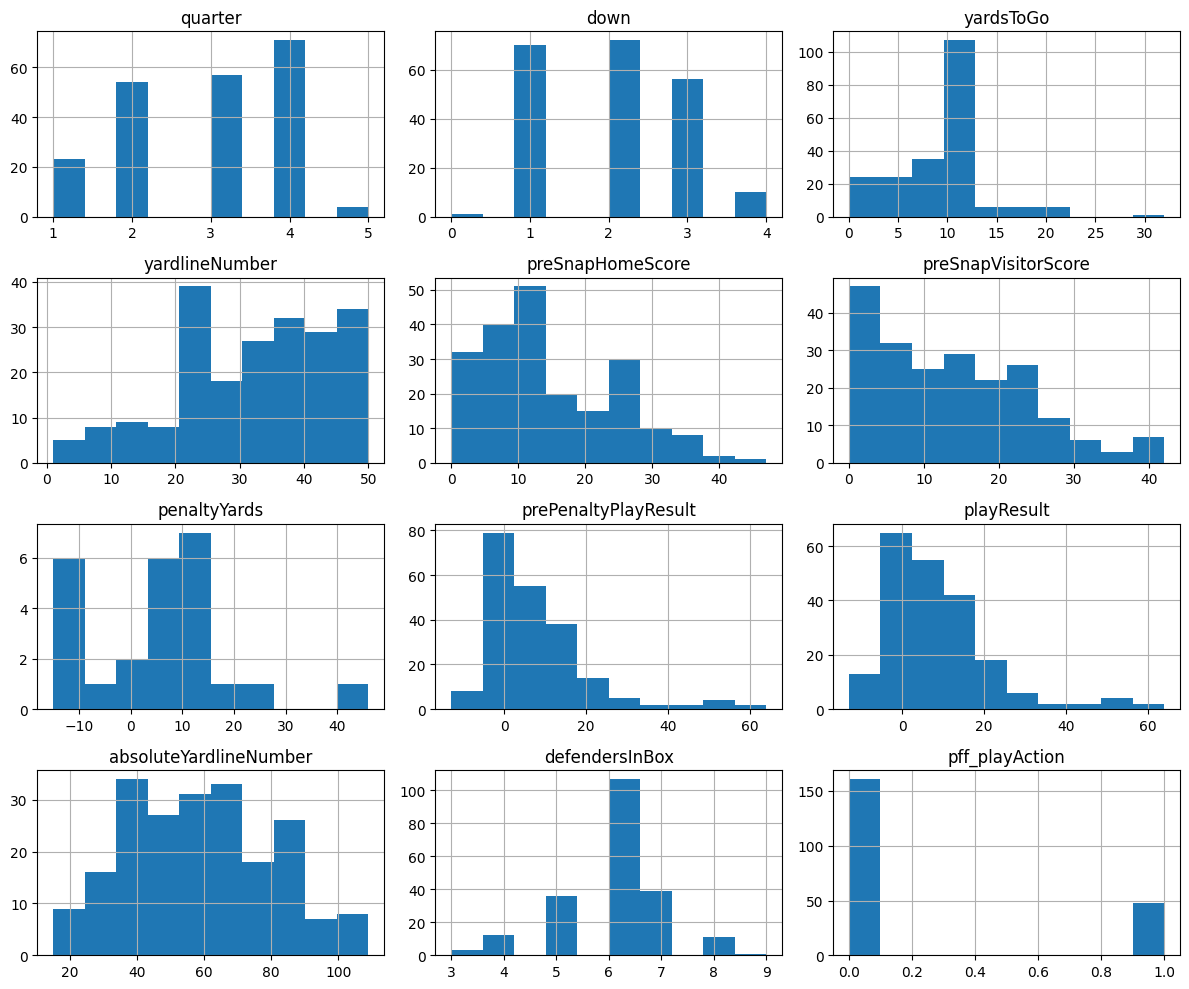

In [26]:
injury_only = plays[plays['playDescription'].str.contains("injur")]
injury_only_numeric = injury_only.select_dtypes(include=['number'])
injury_filtered = injury_only_numeric[['quarter', 'down', 'yardsToGo', 'yardlineNumber', 'preSnapHomeScore', 'preSnapVisitorScore', 'penaltyYards', 'prePenaltyPlayResult', 'playResult', 'absoluteYardlineNumber', 'defendersInBox', 'pff_playAction']]
hist_for_numeric_data(injury_filtered)

In [27]:
def boxplots(df):
    num_cols = len(df.columns)  
    rows = 3  
    cols = 4  
    total_plots = min(num_cols, rows * cols)  
    
    fig, axes = plt.subplots(rows, cols, figsize=(20, 15))  
    axes = axes.flatten()  

    for i, col in enumerate(df.columns[:total_plots]):  
        df.boxplot(column=col, ax=axes[i]) 
        axes[i].set_title(f"Boxplot for {col}")  

    for j in range(i + 1, rows * cols):
        fig.delaxes(axes[j]) 

    plt.tight_layout()  
    plt.show()

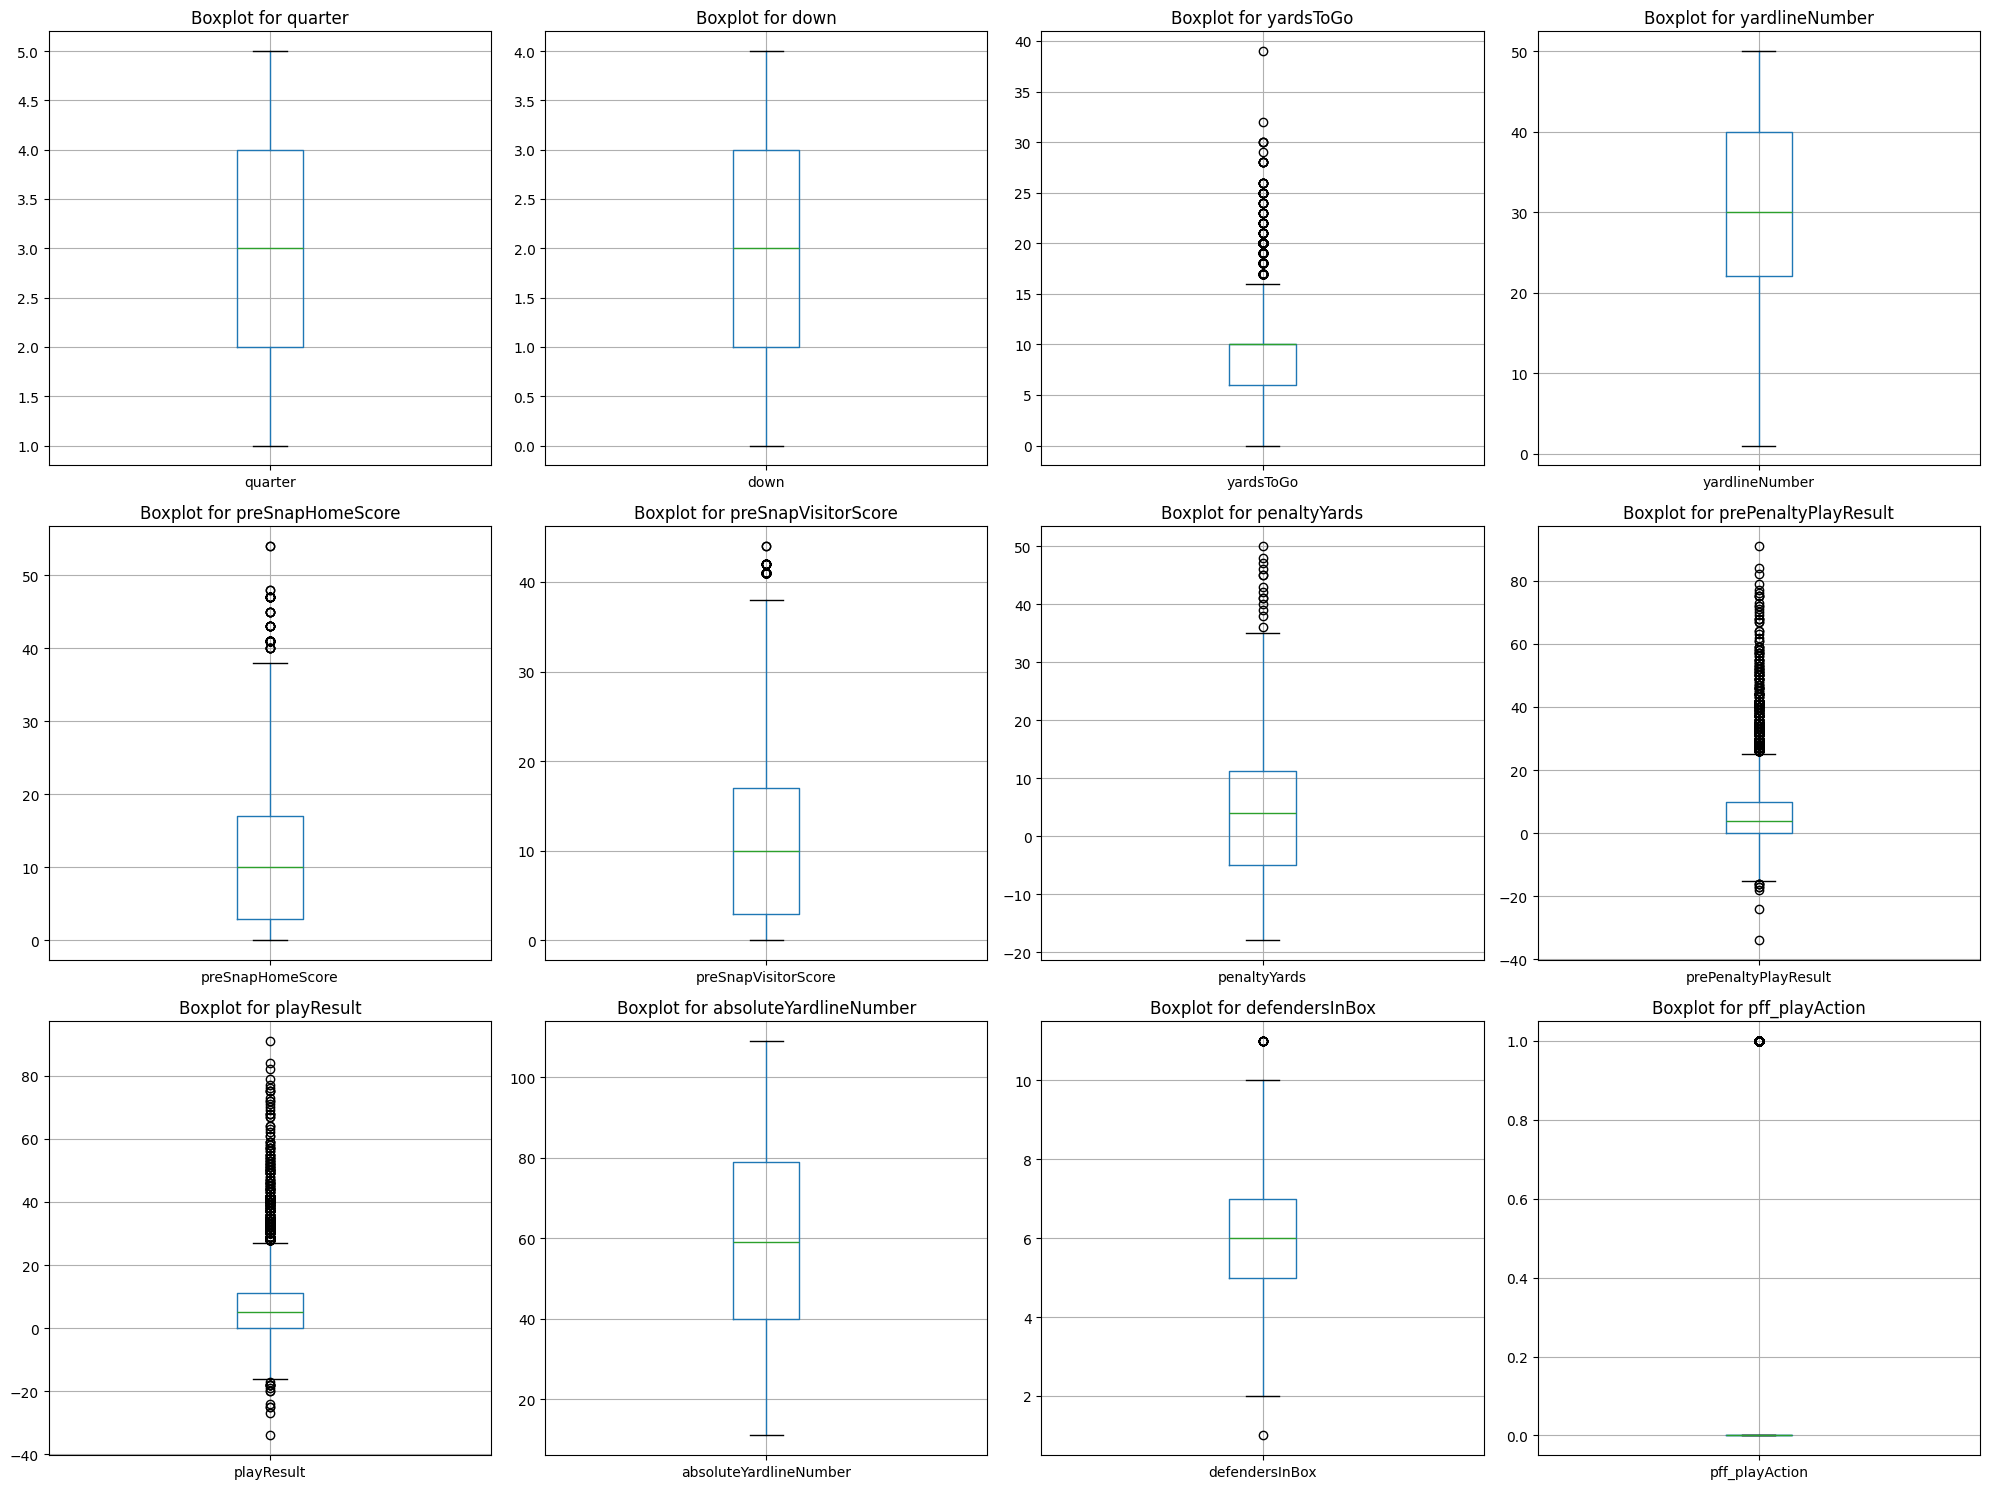

In [28]:
boxplots(all_plays_hist)

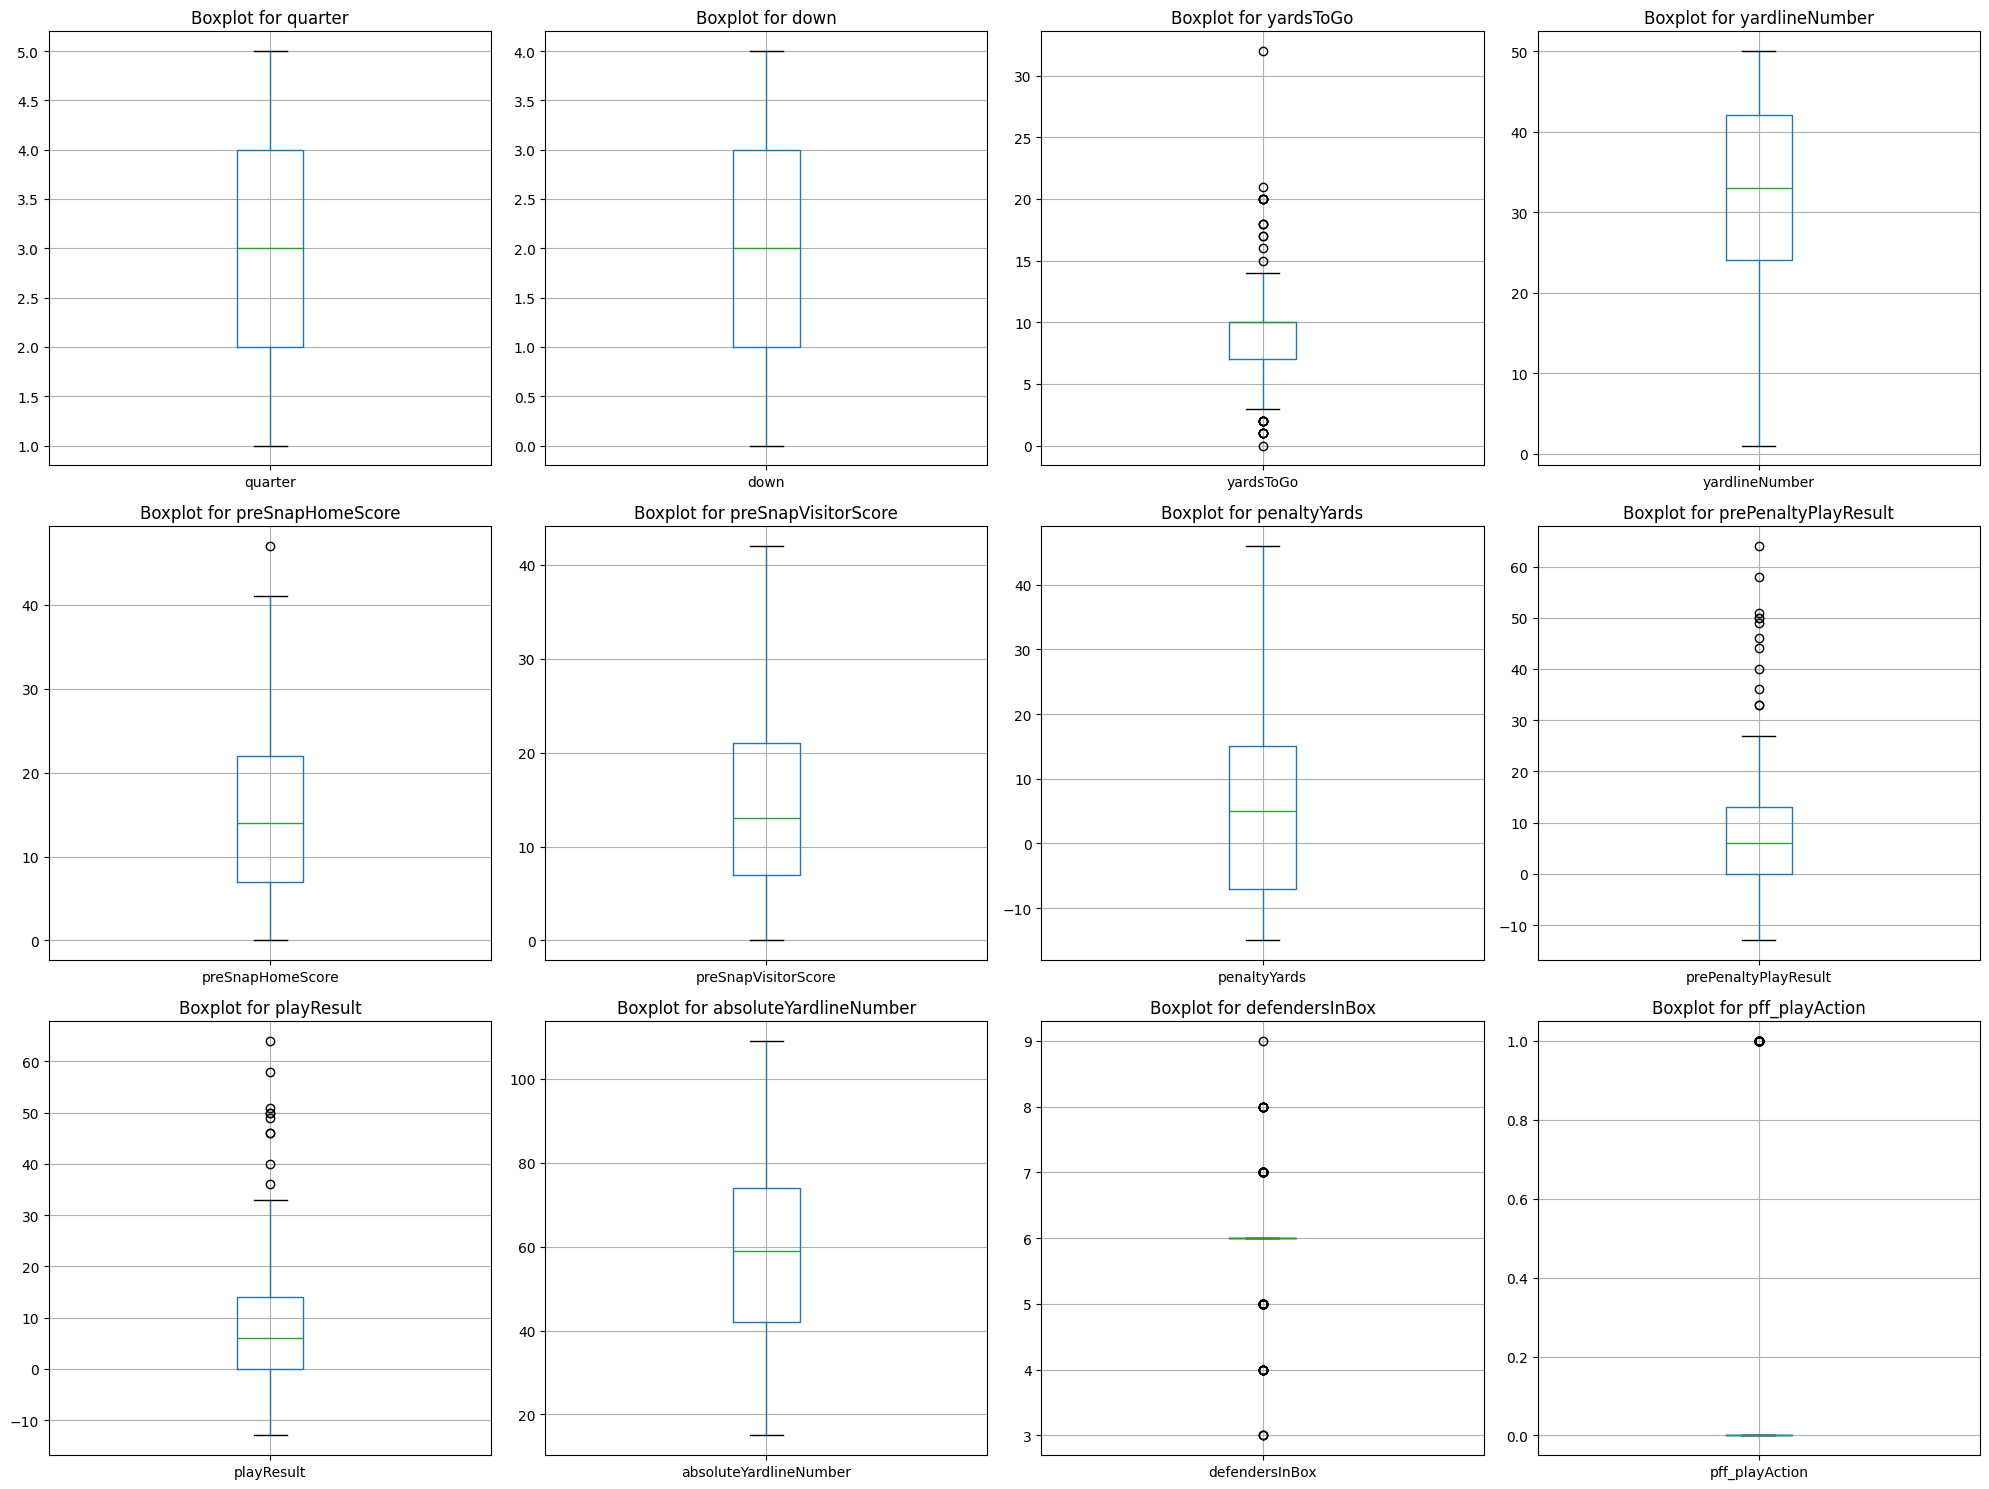

In [29]:
boxplots(injury_filtered)

## **Univariate Analysis Overview**

### Here are some types of analysis you can do  Use Google, documentation, and ChatGPT to help you:

**1) Summarize the datasets using info() and describe()**

The main things I'm interested in are the games and plays datasets as they most directly address the questions taht the author of the datasets had in mmind regarding injury information. Regarding these two datasets, the data is largely intact with the only real null values being for the Penalties. Nulls in these fields would make total sense as well as not every play will result in a penalty. 

**2) Are there any duplicate rows?**
**3) Are there any duplicate values in a given column (when this would be inappropriate?)**

There are no duplicate rows in the dataset. There are duplicate *values* in each of the columns as summarized by the duplicates_per_column function, however there were no duplicates that were found to significantly effect the analysis. It would be innapropriate if these duplicates were found to impact any primary keys that would impact the analysis, but thankfully that is not the case. 


**4) What are the mean, median, and mode of each column?**

The data of these datasets (at least the data pertaining to the injury analysis that was mentioned by the authors), is mostly categorical data, but the summary of the Mean / Median / Mode of the plays data is in the output of cell [11]. 

**5) Are there any missing or null values?**

-   **5.a) Do you want to fill in the missing value with a mean value?  A value of your choice?  Remove that row?**


Regarding the Null values, I don't believe that there is a huge need for us to do any imputation of the null values for this analysis. The only relavent fields that had null values were the penalty fields and (at least at this time) their presense does not present are real problem. 

**6) Identify any other inconsistent data (e.g. someone seems to be taking an action before they are born.)**

The dataset is really high quality and at least at this point, there is not a lot of inconsistancies that would effect the analysis of injury data. 

**7) Encode any categorical variables (e.g. with one-hot encoding.)**

Categorical variables that are pertinant to the analysis of injury prevalence will be one-hot encoded for future ML analysis.

### **Conclusions:**

**8) Are the data usable?  If not, find some new data!**

Yes

**9) Do you need to modify or correct the data in some way?**

We're probably going to have to add in another column to record injuries in a boolean manner, and once we evaluate which features have a strong influence on the target variable through bivariate analysis, then we can trim the feature set we have down and then use one-hot encoding to do the analysis. 

**10) Is there any class imbalance?  (Categories that have many more items than other categories).**

There are definitely some class imbalances, although the class imbalances for this dataset are way less than the others -- (Injuries only make up around 2 % of plays in this dataset.) Moving forward, the disparity between this dataset and the other dataset from NFL 1st and Future will definitely need to be accounted for and if we start training models for predictions, we will need to ensure that we down-sample the non-injury plays in order to accurately get a handle on what features are correlated to the target variable. 

#### **Adding an Injury Column for BiVariate Analysis**

In [30]:
plays_w_inj = plays[plays['playDescription'].str.contains("injur")].index
plays['Inj_Occured'] = np.where(plays.index.isin(plays_w_inj), 1, 0)
plays

gameId  playId                                    playDescription  \
0     2021090900      97  (13:33) (Shotgun) T.Brady pass incomplete deep...   
1     2021090900     137  (13:18) (Shotgun) D.Prescott pass deep left to...   
2     2021090900     187  (12:23) (Shotgun) D.Prescott pass short middle...   
3     2021090900     282  (9:56) D.Prescott pass incomplete deep left to...   
4     2021090900     349  (9:46) (Shotgun) D.Prescott pass incomplete sh...   
...          ...     ...                                                ...   
8552  2021110100    4310  (1:56) (Shotgun) P.Mahomes sacked at NYG 16 fo...   
8553  2021110100    4363  (1:07) (Shotgun) D.Jones pass short right to E...   
8554  2021110100    4392  (1:01) (No Huddle, Shotgun) D.Jones sacked at ...   
8555  2021110100    4411  (:39) (No Huddle, Shotgun) D.Jones pass incomp...   
8556  2021110100    4433  (:35) (Shotgun) D.Jones sacked at NYG 14 for -...   

      quarter  down  yardsToGo possessionTeam defensiveTeam yardlineSide  \
0           1     3          2             TB           DAL           TB   
1           1     1         10            DAL            TB          DAL   
2           1     2          6            DAL            TB          DAL   
3           1     1         10            DAL            TB           TB   
4           1     3         15            DAL            TB           TB   
...       ...   ...        ...            ...           ...          ...   
8552        4     3          8             KC           NYG          NYG   
8553        4     1         10            NYG            KC          NYG   
8554        4     2          7            NYG            KC          NYG   
8555        4     3         15            NYG            KC          NYG   
8556        4     4         15            NYG            KC          NYG   

      yardlineNumber  ... absoluteYardlineNumber  offenseFormation  \
0                 33  ...                   43.0           SHOTGUN   
1                  2  ...                  108.0             EMPTY   
2                 34  ...                   76.0           SHOTGUN   
3                 39  ...                   49.0        SINGLEBACK   
4                 44  ...                   54.0           SHOTGUN   
...              ...  ...                    ...               ...   
8552               8  ...                   18.0           SHOTGUN   
8553              25  ...                   35.0           SHOTGUN   
8554              28  ...                   38.0           SHOTGUN   
8555              20  ...                   30.0           SHOTGUN   
8556              20  ...                   30.0           SHOTGUN   

            personnelO defendersInBox        personnelD  dropBackType  \
0     1 RB, 1 TE, 3 WR            6.0  4 DL, 2 LB, 5 DB   TRADITIONAL   
1     1 RB, 2 TE, 2 WR            6.0  4 DL, 4 LB, 3 DB   TRADITIONAL   
2     0 RB, 2 TE, 3 WR            6.0  3 DL, 3 LB, 5 DB   TRADITIONAL   
3     1 RB, 2 TE, 2 WR            6.0  4 DL, 3 LB, 4 DB   TRADITIONAL   
4     1 RB, 1 TE, 3 WR            7.0  3 DL, 4 LB, 4 DB   TRADITIONAL   
...                ...            ...               ...           ...   
8552  1 RB, 1 TE, 3 WR            4.0  1 DL, 3 LB, 7 DB      SCRAMBLE   
8553  1 RB, 1 TE, 3 WR            5.0  4 DL, 1 LB, 6 DB      SCRAMBLE   
8554  1 RB, 1 TE, 3 WR            6.0  4 DL, 1 LB, 6 DB   TRADITIONAL   
8555  1 RB, 1 TE, 3 WR            5.0  4 DL, 1 LB, 6 DB   TRADITIONAL   
8556  1 RB, 1 TE, 3 WR            6.0  4 DL, 1 LB, 6 DB   TRADITIONAL   

      pff_playAction pff_passCoverage  pff_passCoverageType Inj_Occured  
0                  0          Cover-1                   Man           0  
1                  0          Cover-3                  Zone           0  
2                  0          Cover-3                  Zone           0  
3                  1          Cover-3                  Zone           0  
4                  0          Cover-3                  Zone 

**The authors of the dataset mentoned concussions in their analysis so I will seach up that type of injury specifically.**




In [31]:
plays[plays['playDescription'].str.contains("conc")]


gameId  playId                                    playDescription  \
5406  2021101012    2492  (10:10) (Shotgun) D.Prescott pass incomplete d...   

      quarter  down  yardsToGo possessionTeam defensiveTeam yardlineSide  \
5406        3     2          6            DAL           NYG          DAL   

      yardlineNumber  ... absoluteYardlineNumber  offenseFormation  \
5406              40  ...                   50.0           SHOTGUN   

            personnelO defendersInBox        personnelD  dropBackType  \
5406  1 RB, 2 TE, 2 WR            7.0  3 DL, 4 LB, 4 DB   TRADITIONAL   

      pff_playAction pff_passCoverage  pff_passCoverageType Inj_Occured  
5406               1          Cover-3                  Zone           1  

[1 rows x 33 columns]

There is only one concussion registered in the dataset, so I think that looking into concussions specifically with this dataset is too narrow for the sake of injury analysis. 

___

## **Bivariate Analysis:**


1. Find correlations between pairs of variables.

2. Draw scatterplots, especially when the correlation is large.

3. Draw pairplots.

4. Draw line graphs and/or area graphs when there is date or time data together with numerical data.

In [32]:
def corr_heatmap(df):
    plt.figure(figsize=(10, 8))
    sns.heatmap(df.corr(),
                annot=True,
                fmt=".2f", 
                cmap="coolwarm",
                linewidths=0.5)
    plt.title(f"Correlation Heatmap")
    plt.show()

foulNFLId3 (plays in which there are three fouls on the play) is only used once in the entire dataset. Because of this, including it in the correlation heatmap with the others will just result in a blank row. For this reason, I am dropping it before moving forward. 

In [33]:
plays_numeric = plays_numeric.drop(columns='foulNFLId3', axis=1)

In [34]:
plays_numeric

gameId  playId  quarter  down  yardsToGo  yardlineNumber  \
0     2021090900      97        1     3          2              33   
1     2021090900     137        1     1         10               2   
2     2021090900     187        1     2          6              34   
3     2021090900     282        1     1         10              39   
4     2021090900     349        1     3         15              44   
...          ...     ...      ...   ...        ...             ...   
8552  2021110100    4310        4     3          8               8   
8553  2021110100    4363        4     1         10              25   
8554  2021110100    4392        4     2          7              28   
8555  2021110100    4411        4     3         15              20   
8556  2021110100    4433        4     4         15              20   

      preSnapHomeScore  preSnapVisitorScore  penaltyYards  \
0                    0                    0           NaN   
1                    0                    0           NaN   
2                    0                    0           NaN   
3                    0                    0           NaN   
4                    0                    0           NaN   
...                ...                  ...           ...   
8552                17                   17           NaN   
8553                20                   17           NaN   
8554                20                   17           NaN   
8555                20                   17           NaN   
8556                20                   17           NaN   

      prePenaltyPlayResult  playResult  foulNFLId1  foulNFLId2  \
0                        0           0         NaN         NaN   
1                       28          28         NaN         NaN   
2                        5           5         NaN         NaN   
3                        0           0         NaN         NaN   
4                        0           0         NaN         NaN   
...                    ...         ...         ...         ...   
8552                    -8          -8         NaN         NaN   
8553                     3           3         NaN         NaN   
8554                    -8          -8         NaN         NaN   
8555                     0           0         NaN         NaN   
8556                    -5          -5         NaN         NaN   

      absoluteYardlineNumber  defendersInBox  pff_playAction  
0                       43.0             6.0               0  
1                      108.0             6.0               0  
2                       76.0             6.0               0  
3                       49.0             6.0               1  
4                       54.0             7.0               0  
...                      ...             ...             ...  
8552                    18.0             4.0               0  
8553                    35.0             5.0               0  
8554                    38.0             6.0               0  
8555                    30.0             5.0               0  
8556                    30.0             6.0               0  

[8557 rows x 16 columns]

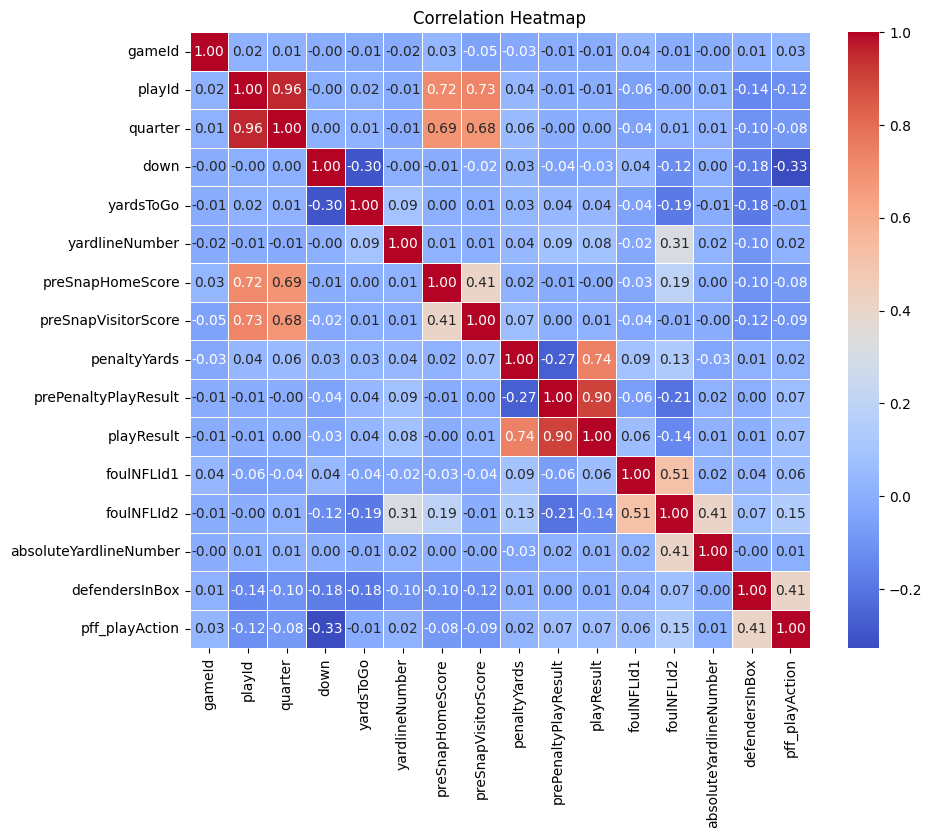

In [35]:
corr_heatmap(plays_numeric)

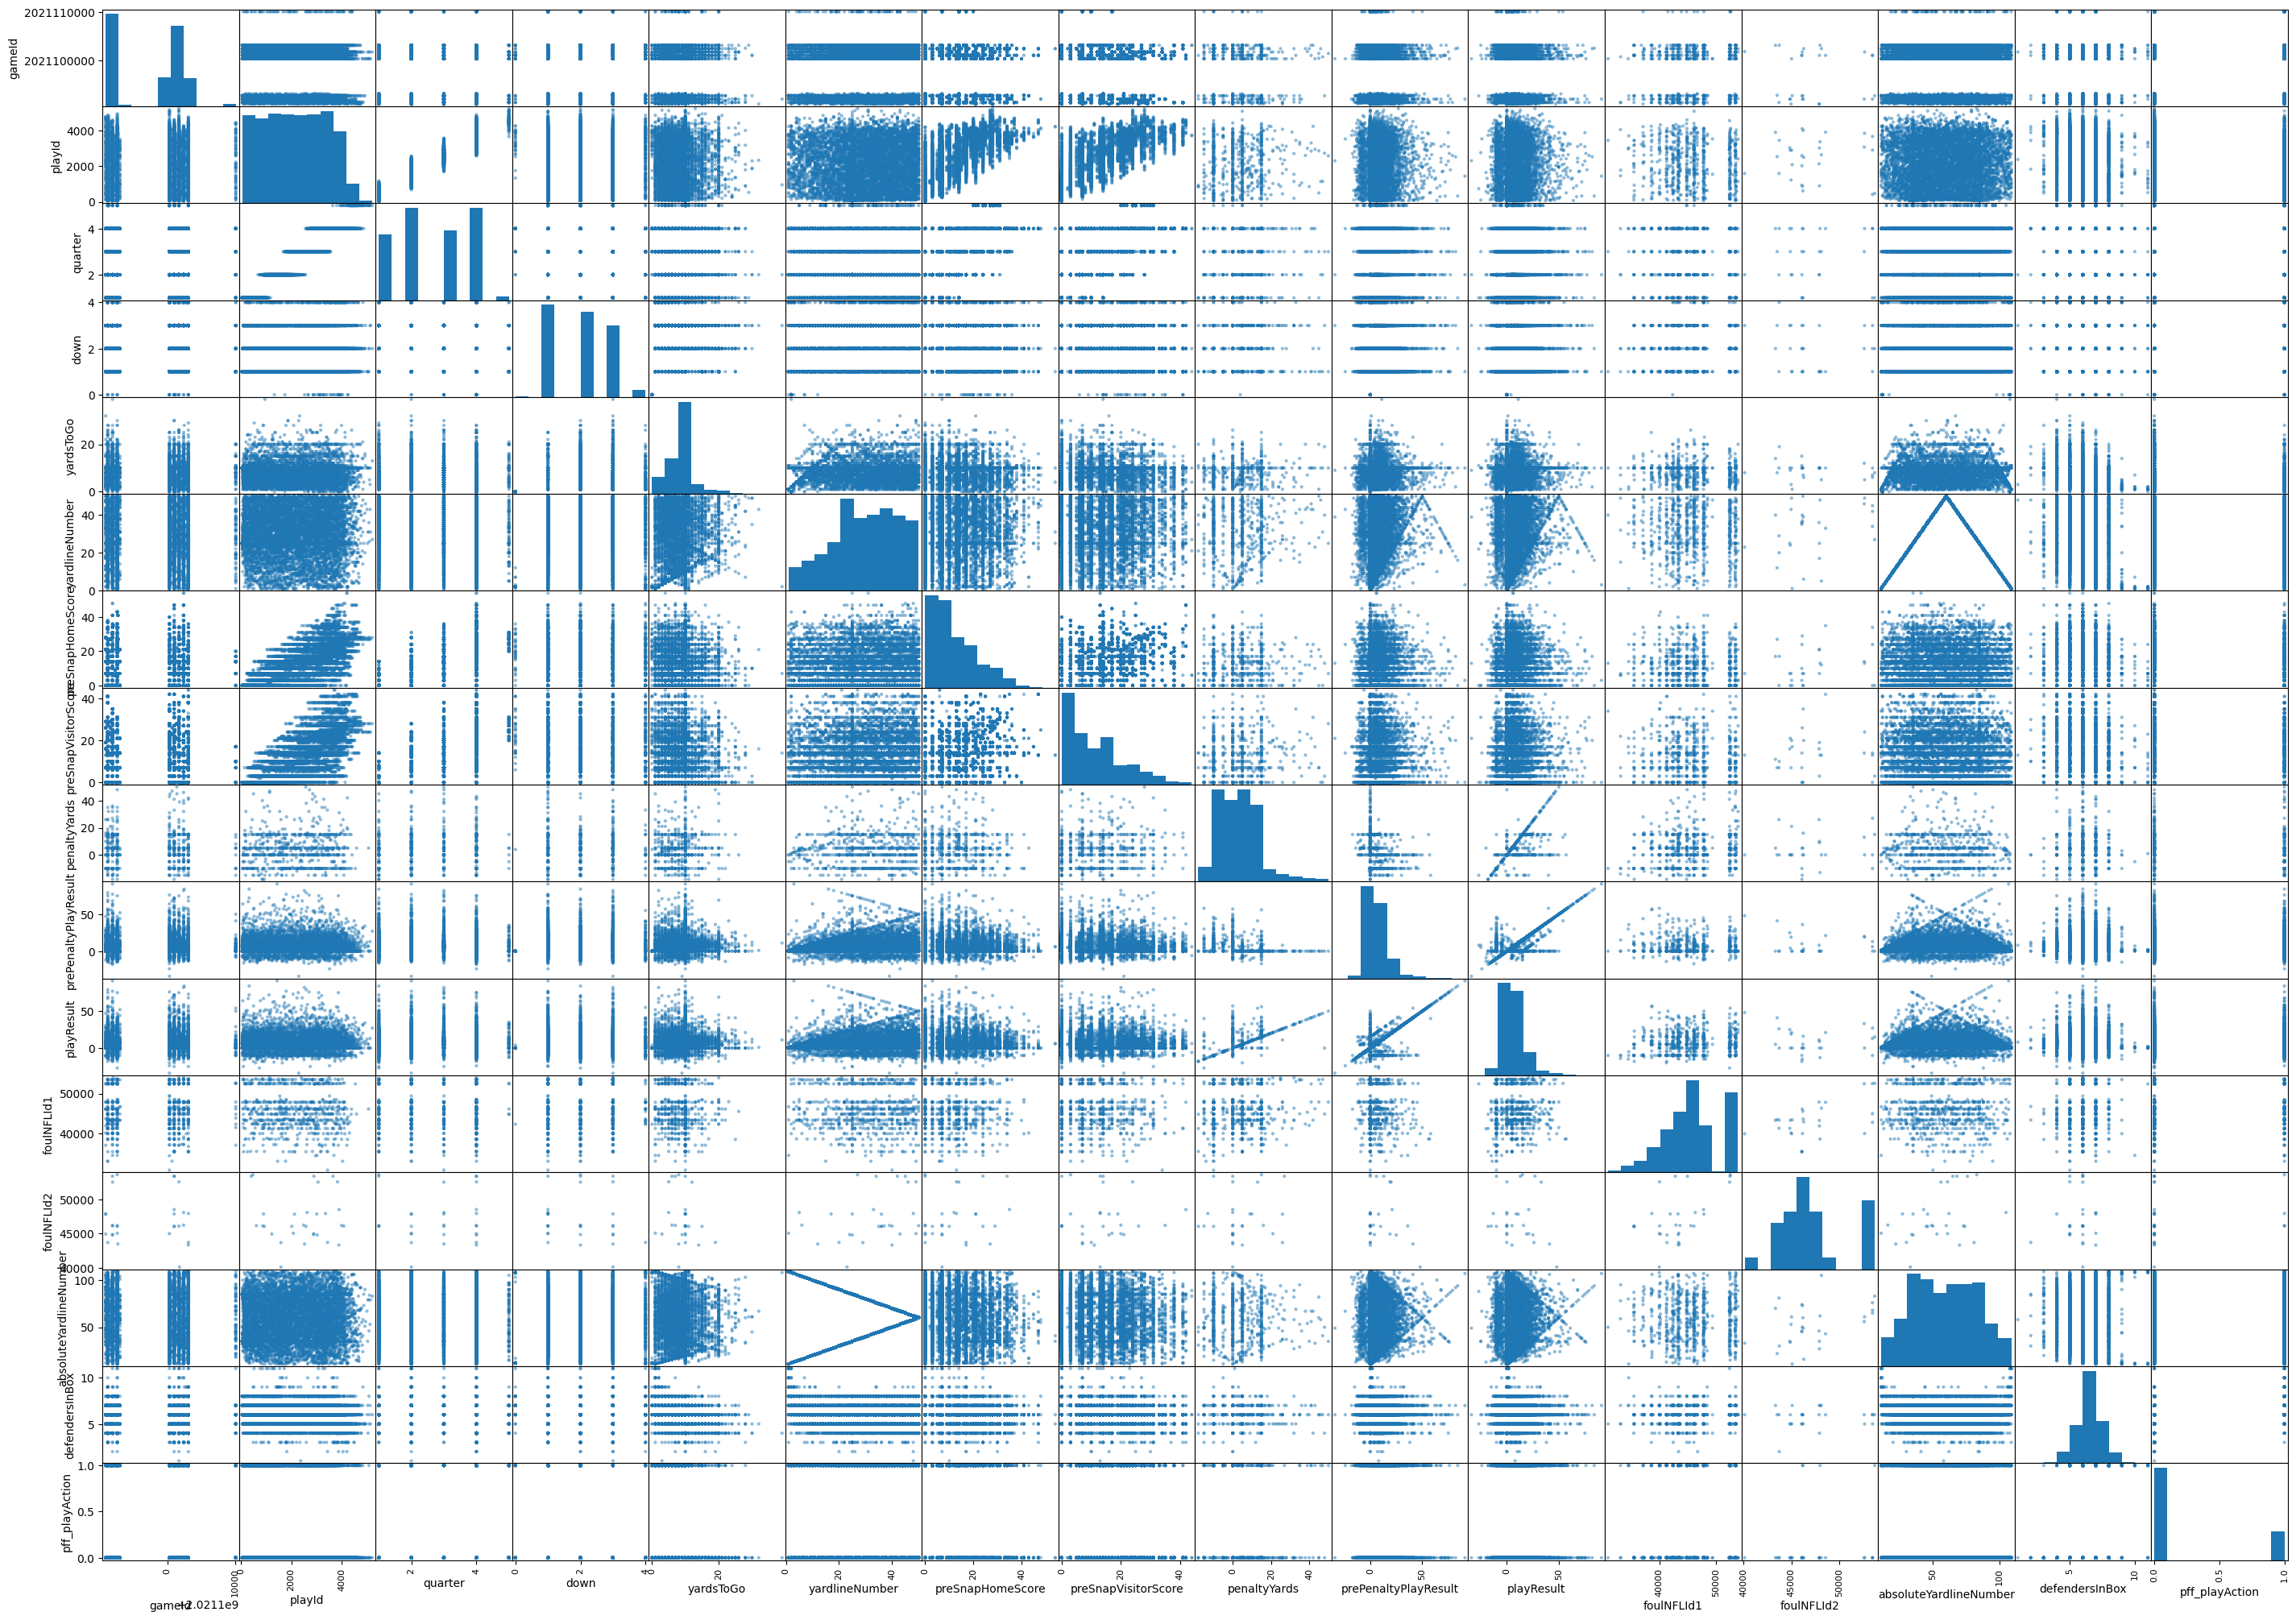

In [36]:
axes = pd.plotting.scatter_matrix(
    plays_numeric,
    c=None,
    alpha=0.5,
    figsize=(35, 25),
    diagonal='hist', 
)
for ax in axes.flatten():
    ax.tick_params(axis="y", labelsize=10) 

plt.show()

___

#### **Now let's explore whether it makes sense to merge in Weekly Play Data with this analysis**

running this just as a test to see if we added back in the NGS statistics if that would have a difference. 

In [37]:
week1merged_numeric = merged_df.select_dtypes(include=['number'])
week1merged_numeric.drop(columns=['frameId', 'foulNFLId3'], inplace=True)
week1merged_categorical = merged_df.select_dtypes(exclude=['number'])

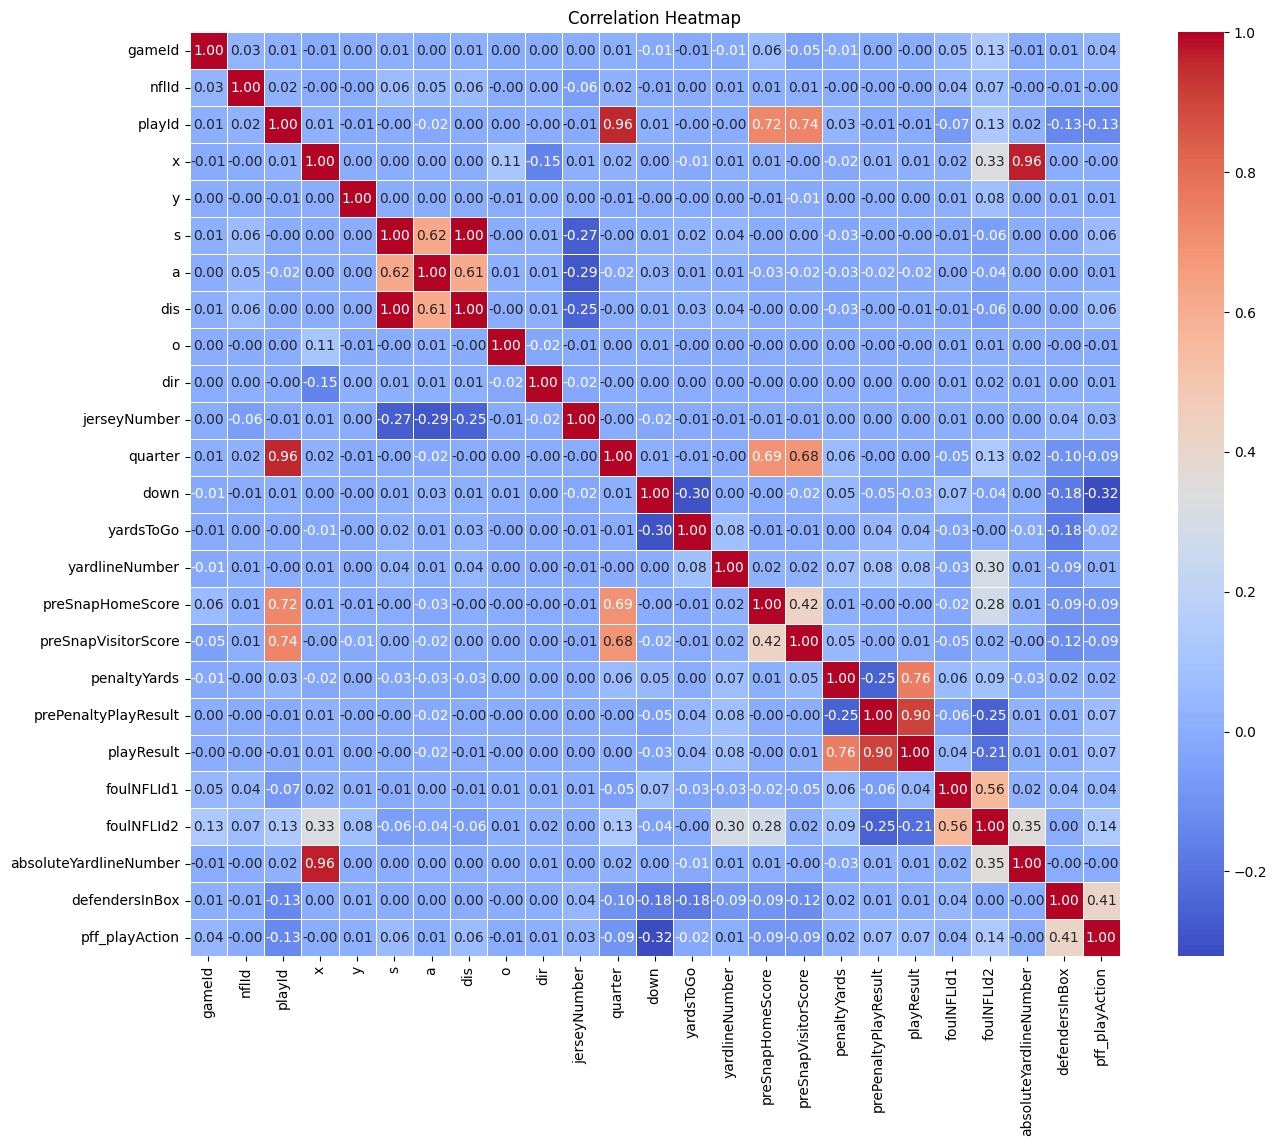

In [38]:
def merged_corr_heatmap(df):
    plt.figure(figsize=(15, 12))
    sns.heatmap(df.corr(),
                annot=True,
                fmt=".2f", 
                cmap="coolwarm",
                linewidths=0.5)
    plt.title(f"Correlation Heatmap")
    plt.show()



merged_corr_heatmap(week1merged_numeric)

#### **Merged Bivariate Analysis** 

Merging the week1 position data to the play data was done in an effort to assertain whether player speed, acceleration, positioning, direction, or orientation  had a significant correlation to features already in the plays dataset (and especially whether these vaariables had an impact on whether an injury occured.)


In this regard, while metrics like frame ID (time measured since a particular play began) had correlations with metrics like speed and acceleration, and x (the measure of where a play occured on the field in terms of x, and y.) had a correlation with yardnumber (another positioning metric and whether fouls occured, this did not reflect directly in the Inj_occurance metric. Therefore, I don't think that this dataset is relevent to this analysis. 

#### **What is the Overall Injury Prevalence in the Dataset?**

In [39]:
inj_plays = len(plays[plays['playDescription'].str.contains('inju')])
plays1 = len(plays)

print(f"Injury Prevalence = {(inj_plays/plays1)*100:.2f}% with {inj_plays} injuries in {plays1} plays.")

Injury Prevalence = 2.44% with 209 injuries in 8557 plays.


____

# *Conclusions:*

#### **- Explain what conclusions you would draw from this analysis: are the data what you expect?  Are the data likely to be usable?  If the data are not useable, find some new data!**

The dataset is really clean however, there are huge class imbalances between injury plays and non-injury plays. In order to fix this, we will need to undersanmple the non-injury plays to get them to be at least somewhat on par with the injury plays. Then we can ascertain if there are any variables that have correlations with the target injury_occured variable. 

#### **- Do you see any outliers?  (Data points that are far from the rest of the data).**

There are outliers in a couple of different variables for this dataset, but none of them are very concerning. For instance, having a few outliers in the YardsToGo variable, (makes total sense because there are times rarely, there are sacks, penalties, etc. that make this number go this high) preSnapHome and preSnapVisitorScore (again, sometimes there are high scoring games), penalty yards, prePenaltyResult, playResult, etc. 

#### **- Are any data items highly correlated with each other, suggesting that they are redundant?**

Yes, there are a number of variables in this analysis that are highly correlated and probably redundant. preSnapHomeScore and preSnapVisitorScore are highly correlated with playId and Quarter (makes sense as scores tend to go up at the game goes on.) and with each other. They can probably be dropped as they do not seem to have any meaningful correlation with other variables.

Additionally, playId and Quarter are highly correlated with each other (0.96) which to my intuition is not intensional, but I believe that Plays were described sequentially, starting with the first play of the game and ending with the last play of the game. This would correlate with the quarter of the game which starts with Q1 and ends with Q4. To mitigate any potential side-effects with this, we can drop the 'quarter' field. 

Additionally, the play result and the prePlayPenalty result are also highly correlated, which we can mitigate by dropping the prePenaltyPlayResult

**Action Items**
- Drop: 
    - preSnapHomeScore
    - preSnapVisitorScore
    - Quarter
    - prePlayPenaltyResult 

#### **- For the line plots, do you see a trend or pattern over time?  Does this suggest that the data are changing over time (drifting) in such a way as to invalidate comparisons?**

- There are a ton of variables that are essentially re-hashes of a 'game clock' in this analysis, and all of these variables are highly correlated to each other. That being said, none of these variables seem to have a high degree of correlation with the target variable at this time. 


- Check FrameId vs other variables with subplots. 

#### **- Can you think of any confounding variables?  (Third variables that could explain any correlations between other variables.  These third variables may or may not be reported in the dataset.)**

There are a lot of confounding variables in this dataset in the sense that a lot of variables are highly dependent on relative time metrics (quarter, down, yardstoGo, score, etc. all evolve over time during the course of a game). With this in mind, we should take care to make sure that we can handle these features with feature selection before a model is built. 



___

# **Data Remediations**


To address the class imbalance described above, we implemented undersampling of injury plays. While oversampling was considered, it was ultimately avoided to prevent excessive duplication of a small dataset—especially given the extreme imbalance (e.g., only 100 injuries in a dataset of over 260,000 plays).

The following code was taken and adapted from ChatGPT: 
- https://chatgpt.com/share/67c9d8c4-b23c-800f-bb50-7475bf8c0d3a


Steps to oversample the injury data were taken out for this analysis. 

In [49]:
from imblearn.under_sampling import RandomUnderSampler


injury_col = 'Inj_Occured'  


injury_plays = plays[plays[injury_col] == 1]
non_injury_plays = plays[plays[injury_col] == 0]

# Undersample non-injury plays (optional, keeping 3x injuries for balance)
undersample_ratio = 3 * len(injury_plays) 
non_injury_plays_sampled = non_injury_plays.sample(n=undersample_ratio, random_state=42)

# Combine undersampled non-injury plays with all injuries
balanced_df = pd.concat([injury_plays, non_injury_plays_sampled])


print("Resampled dataset shape:", balanced_df[injury_col].value_counts())


Resampled dataset shape: Inj_Occured
0    627
1    209
Name: count, dtype: int64


In [50]:
balanced_df_numeric = balanced_df.select_dtypes(include=['number'])
balanced_df_numeric.drop(columns=['foulNFLId3'], inplace=True)
balanced_df_categorical = balanced_df.select_dtypes(exclude=['number'])

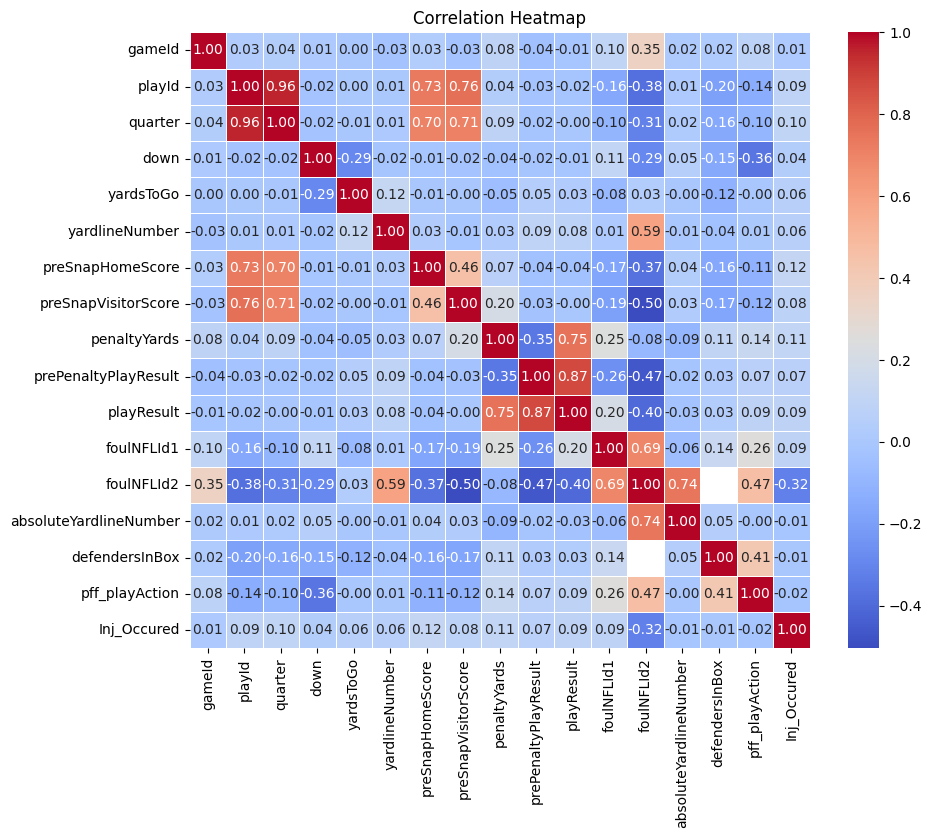

In [51]:
corr_heatmap(balanced_df_numeric)

In [43]:

def chi_square_test(df, target='Inj_Occured'):
    y = df[target]  # Boolean column
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns  # Select categorical columns

    results = {}
    for col in categorical_cols:
        table = pd.crosstab(df[col], y)  # Create contingency table
        chi2, p, dof, expected = stats.chi2_contingency(table)  # Perform Chi-Square test
        results[col] = p * 100 # Store p-value * 100 for readability

    return results  

In [44]:
p_values = chi_square_test(plays)

print("===== Unlikely Correlated to Injury Occurrence ===== \n")
for col, p in sorted(p_values.items(), key=lambda x: x[1], reverse=True):  
    if p >= 30:  
        print(f"p-value ({col}): {p:.2f}% (Correlation likely due to chance)")

print("\n\n===== Most Likely Correlated to Injury Occurrence ===== \n")
for col, p in sorted(p_values.items(), key=lambda x: x[-1], reverse=True):  
    if p < 30:  
        print(f"p-value ({col}): {p:.2f}% ('Significant' correlation)")

===== Unlikely Correlated to Injury Occurrence ===== 

p-value (foulName3): 100.00% (Correlation likely due to chance)
p-value (foulName2): 94.48% (Correlation likely due to chance)
p-value (playDescription): 48.88% (Correlation likely due to chance)
p-value (foulName1): 44.66% (Correlation likely due to chance)
p-value (personnelD): 42.67% (Correlation likely due to chance)


===== Most Likely Correlated to Injury Occurrence ===== 

p-value (gameClock): 25.15% ('Significant' correlation)
p-value (dropBackType): 17.32% ('Significant' correlation)
p-value (possessionTeam): 13.51% ('Significant' correlation)
p-value (personnelO): 10.16% ('Significant' correlation)
p-value (passResult): 7.19% ('Significant' correlation)
p-value (pff_passCoverage): 6.51% ('Significant' correlation)
p-value (pff_passCoverageType): 3.55% ('Significant' correlation)
p-value (defensiveTeam): 2.80% ('Significant' correlation)
p-value (yardlineSide): 1.47% ('Significant' correlation)
p-value (offenseFormation): 

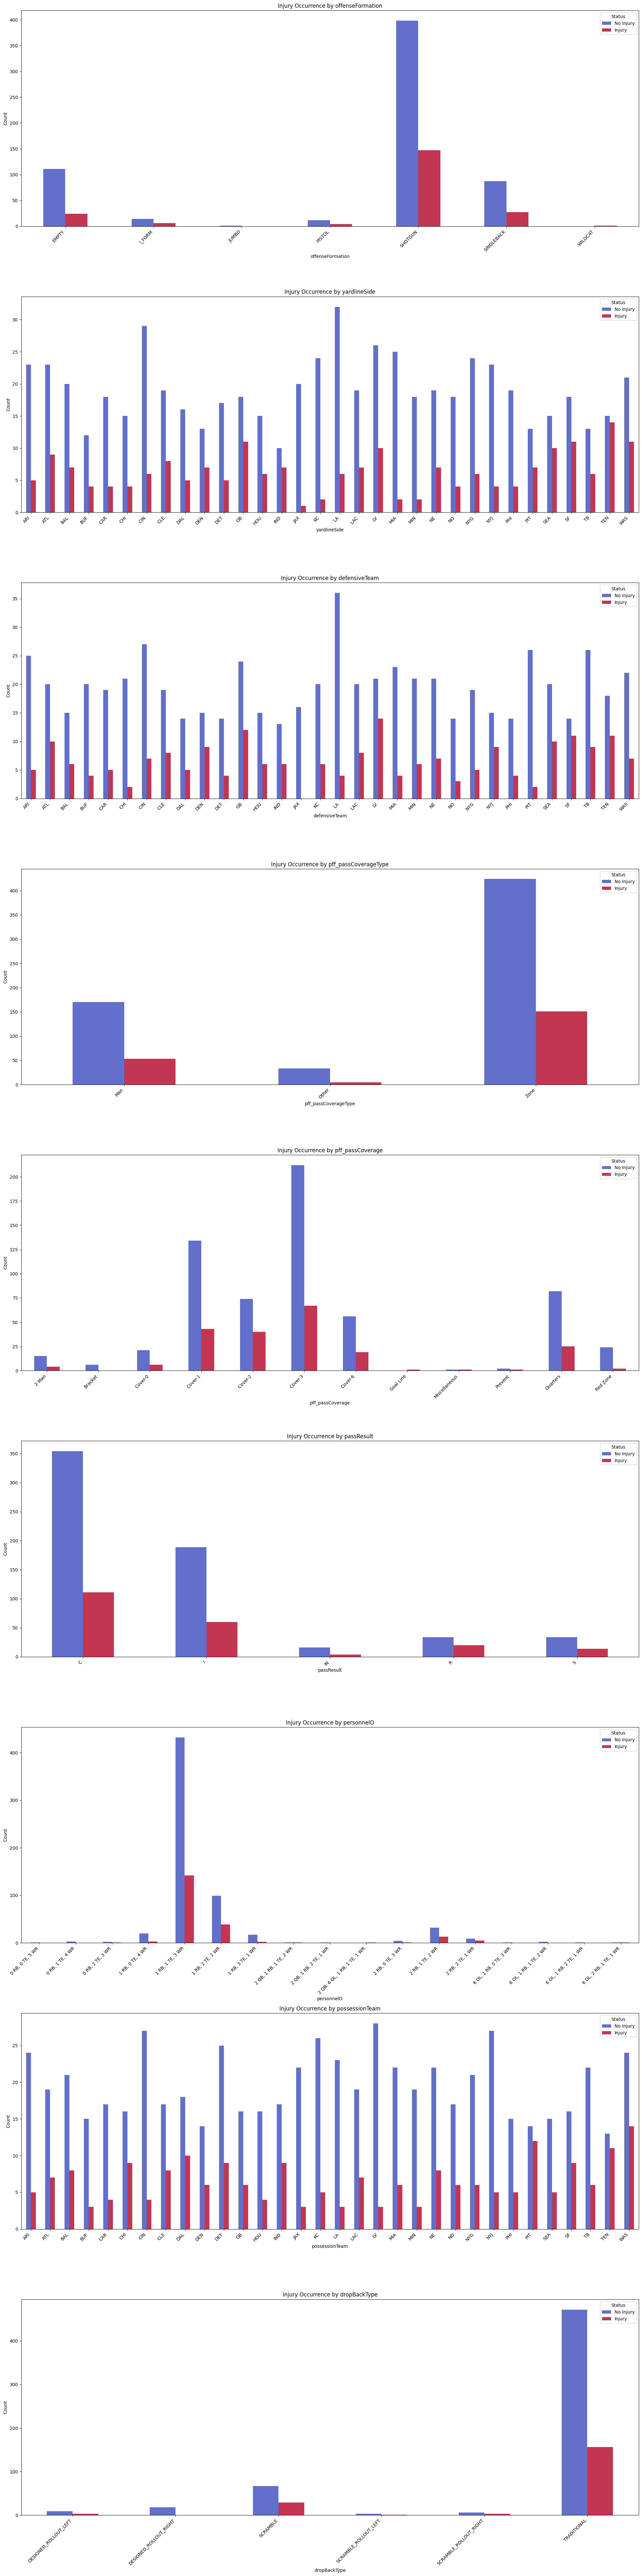

In [45]:
top_4_categorical_vars = sorted(p_values.items(), key=lambda x: x[1])[:10]  # 5 most significant
top_4_categorical_vars = [col for col, p in top_4_categorical_vars]  # Extract column names

fig, axes = plt.subplots(9, 1, figsize=(20, 80), sharey=False)  # Share y-axis for better comparison

# Iterate over top 4 categorical variables and plot them
for ax, col in zip(axes, top_4_categorical_vars):
    crosstab = pd.crosstab(balanced_df[col], balanced_df['Inj_Occured'])  # Get raw counts
    crosstab.plot(kind='bar', stacked=False, ax=ax, colormap='coolwarm', alpha=0.8)

    ax.set_title(f"Injury Occurrence by {col}")
    ax.set_ylabel("Count")  # Since we are using raw counts
    ax.set_xlabel(col)
    # ax.ylim(0, )
    ax.legend(["No Injury", "Injury"], title="Status")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

plt
plt.tight_layout()
plt.show()

And tracking injury rates of the top 9 boosted classes. 

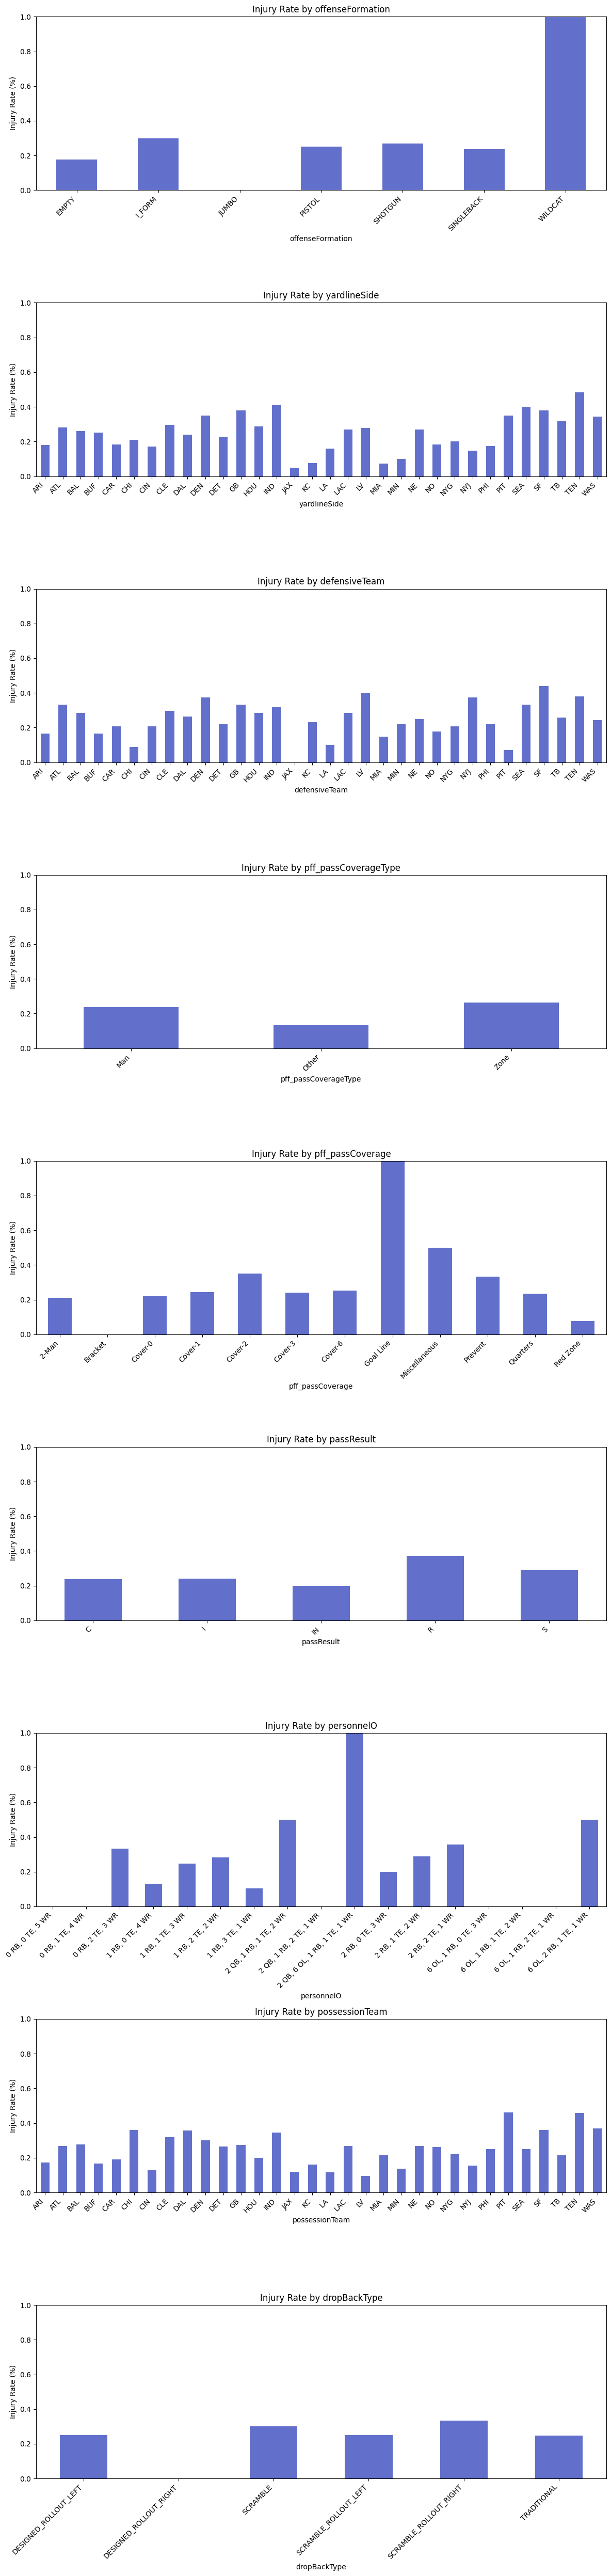

In [46]:
# Select the top 9 categorical variables with lowest p-values
top_categorical_vars = sorted(p_values.items(), key=lambda x: x[1])[:9]  # 9 most significant
top_categorical_vars = [col for col, p in top_categorical_vars]  # Extract column names

# Create a 9-row, 1-column figure
fig, axes = plt.subplots(9, 1, figsize=(12, 50), sharey=False)  # Adjust size for clarity

# Iterate over top categorical variables and plot injury rate
for ax, col in zip(axes, top_categorical_vars):
    # Get counts of injuries vs. non-injuries for each category
    crosstab = pd.crosstab(balanced_df[col], balanced_df['Inj_Occured'])

    # Calculate injury rate (injury plays / total plays)
    injury_rate = crosstab[1] / crosstab.sum(axis=1)  # Assuming '1' is Injury, '0' is No Injury

    # Plot as a standard bar chart (not side-by-side)
    injury_rate.plot(kind='bar', ax=ax, colormap='coolwarm', alpha=0.8)

    # Formatting
    ax.set_title(f"Injury Rate by {col}")
    ax.set_ylabel("Injury Rate (%)")
    ax.set_xlabel(col)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
    ax.set_ylim(0, 1)  # Injury rate is between 0 and 1

plt.tight_layout()
plt.show()